In [207]:
#Importing libraries
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Our dataset
df = pd.read_csv('car_prices.csv')

In [138]:
df

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [5]:
#Correlation table
df.corr()

,Unnamed: 0,year,mileage,vol_engine,price
Unnamed: 0,1.000000,0.109642,-0.113876,-0.155028,-0.064164
year,0.109642,1.000000,-0.731958,-0.161557,0.596181
mileage,-0.113876,-0.731958,1.000000,0.206169,-0.542808
vol_engine,-0.155028,-0.161557,0.206169,1.000000,0.299669
price,-0.064164,0.596181,-0.542808,0.299669,1.000000


#### Mileage - the distance that a vehicle has travelled or the distance that it can travel using a particular amount of fuel
#### The year and mileage colums have a high corr with price column, because we only need 2 features, we wont transform the rest of
#### the dataset with dummy variables - that we'll give us columns with lower correlation score

In [94]:
#Dataset with outliers
X = df.iloc[:, 4:6].values
y = df['price'].values


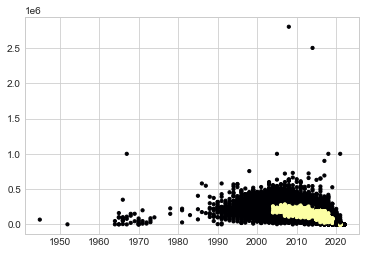

In [121]:
#Isolation Forest algorithm
isolation_forest = IsolationForest()
y_pred_1 = isolation_forest.fit_predict(X)
#Plotting data and outliers
plt.scatter(X[:,0], X[:,1], c = y_pred_1, s = 10, cmap='inferno')

In [107]:
#contamination list with different values
contamination = [0.1, 0.2, 0.3, 0.4, 0.5]
#in list_1 we'll store the number of outliers according to contamination values for Isolation forest
list_1 = []
for i in contamination:
    #Instantiating the model
    isolation_forest = IsolationForest(max_samples='auto',contamination=i,random_state=42)
    #The fit_predict method, and storing predicted values in y_pred_1 variable
    y_pred_1 = isolation_forest.fit_predict(X)
    #Appending the number of outliers(-1)
    list_1.append(np.count_nonzero(y_pred_1 == -1))

In [131]:
#One class algorithm
svm = OneClassSVM()
svm.fit(X)
y_pred_2 = svm.predict(X)

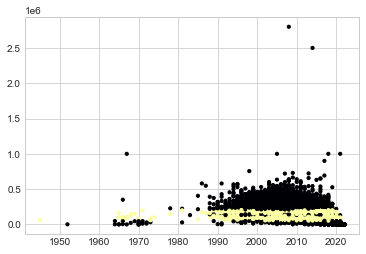

In [134]:
#Plotting data and outliers
plt.scatter(X[:,0], X[:,1], c = y_pred_2, s = 10, cmap = 'inferno')

In [133]:
#in list_2 we'll store the number of outliers according to contamination values for OneClassSVM
list_2 = []
for i in contamination:
    #Instantiating the model
    svm = OneClassSVM(nu = i)
    #The fit and predict method, and storing predicted values in y_pred_2 variable
    svm.fit(X)
    y_pred_2 = svm.predict(X)
    list_2.append(np.count_nonzero(y_pred_2 == -1))

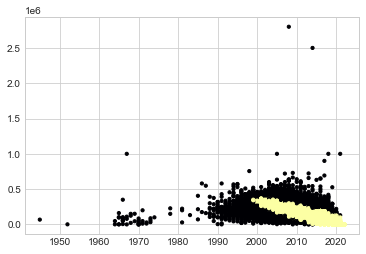

In [122]:
#Eliptic Envelope algorithm
eliptic = EllipticEnvelope()
eliptic.fit(X)
#Plotting data and outliers
plt.scatter(X[:,0], X[:,1], c = eliptic.predict(X), s = 10, cmap = 'inferno')

In [106]:
#in list_3 we'll store the number of outliers according to contamination values for Eliptic Envelope
list_3 = []
for i in contamination:
    #Instantiating the model
    eliptic = EllipticEnvelope(contamination = i)
    #The fit and predict method, and storing predicted values in y_pred_3 variable
    eliptic.fit(X)
    y_pred_3 = eliptic.predict(X)
    list_3.append(np.count_nonzero(y_pred_3 == -1))

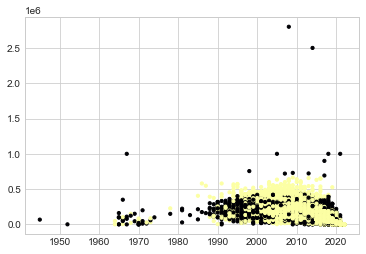

In [124]:
#Local Outlier Factor algorithm
outlier_factor = LocalOutlierFactor()
y_pred_4 = outlier_factor.fit_predict(X)
#Plotting data and outliers
plt.scatter(X[:,0], X[:,1], c = y_pred_4, s = 10, cmap = 'inferno')

In [108]:
#in list_4 we'll store the number of outliers according to contamination values for LocalOutlierFactor
list_4 = []
for i in contamination:
    #Instantiating the model
    outlier_factor = LocalOutlierFactor(n_neighbors=30, contamination=i)
    #The fit_predict method, and storing predicted values in y_pred_4 variable
    y_pred_4 = outlier_factor.fit_predict(X)
    list_4.append(np.count_nonzero(y_pred_4 == -1))

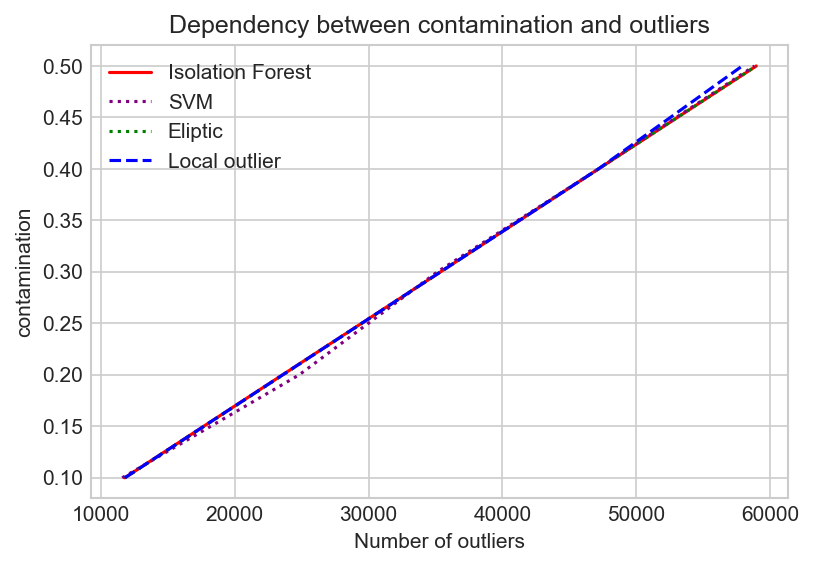

In [137]:
#plt.style directive is used to style our figures
plt.style.use('seaborn-whitegrid')
fig = plt.figure(dpi=150)
ax = plt.axes()
#Creating line plots for every number of outliers depending on contamination
plt.plot(list_1, contamination, color = 'red', label = 'Isolation Forest')
plt.plot(list_2, contamination, color = 'purple',linestyle = 'dotted', label = 'SVM')
plt.plot(list_3, contamination, color = 'green',linestyle = 'dotted', label = 'Eliptic')
plt.plot(list_4, contamination, color = 'blue',linestyle = 'dashed', label = 'Local outlier')
#setting the title of our figure
plt.title('Dependency between contamination and outliers')
plt.xlabel('Number of outliers')
plt.ylabel('contamination')
#display the legend
plt.legend()

#### All of the outliers detection algorithms has detected approximately the same numbers of outliers, also the dependency between the contamination and number of outliers is linear 

In [184]:
#Working with Isolation Forest algorithm
df1 = df.iloc[:, 4:7] #creating a new df with the 3 columns with highest corr score
df1['price'] = df['price'] #adding target column
df1 = df1.drop(df[ y_pred_1 == -1 ].index, inplace = False) #removing rows that were predicted as outliers
X1 = df1.values #feature matrix
y1 = df1['price'].values #target vector

In [186]:
#Working with One Class SVM
df2 = df.iloc[:, 4:7]#creating a new df with the 3 columns with highest corr score
df2['price'] = df['price']#adding target column
df2 = df2.drop(df[ y_pred_2 == -1 ].index, inplace = False)#removing rows that were predicted as outliers
X2 = df2.values#feature matrix
y2 = df2['price'].values #target vector

In [187]:
#Working with Eliptic EEnvelope
df3 = df.iloc[:, 4:7]#creating a new df with the 3 columns with highest corr score
df3['price'] = df['price']#adding target column
df3 = df3.drop(df[ y_pred_3 == -1 ].index, inplace = False)#removing rows that were predicted as outliers
X3 = df3.values#feature matrix
y3 = df3['price'].values #target vector

In [188]:
#Working with Local Outlier Factor
df4 = df.iloc[:, 4:7]#creating a new df with the 3 columns with highest corr score
df4['price'] = df['price']#adding target column
df4 = df4.drop(df[ y_pred_4 == -1 ].index, inplace = False)#removing rows that were predicted as outliers
X4 = df4.values#feature matrix
y4 = df4['price'].values #target vector

In [185]:
#Splitting the data in train and test with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

array([ 35900,  78501,  30800, ..., 135000, 154500, 130000], dtype=int64)

In [229]:
for X, y in [[X,y],[X1, y1], [X2, y2],[X3,y3], [X4, y4]]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    

In [230]:
#A function that will train each of our 4 sub-sets on Linear Regression and KNNRegresson
def train(X, y, model, acc):
    if model == 'LinearRegression':
        #Create an instance of the Linear Regression class from sklearn.
        model = LinearRegression()
    elif model == 'KNN':
        model = KNeighborsRegressor()
    #Splitting the data in train and test with train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    #Call the fit function , which applies the Linear Regression model
    model.fit( X_train, y_train)
    #Define a variable that stores the predictions of our model .
    y_pred = model.predict(X_test)
    acc.append(mean_absolute_error(y_pred, y_test))
    #Returning accuracy list
    return acc

In [214]:
#acc1 is the list in witch we'll store the scores
acc1 = []
#Training on
train(X1, y1, 'KNN', acc1)

[208.57914322485755]

In [215]:
train(X2, y2, 'KNN', acc1)

[208.57914322485755, 205.60846960640575]

In [247]:
#acc1 is the list in witch we'll store the scores
acc1 = []
for X, y in [[X,y],[X1, y1], [X2, y2],[X3,y3], [X4, y4]]:
    #Training on Linear Regression each of the 4 subsets and the original one
    train(X, y, 'LinearRegression', acc1)

In [248]:
for X, y in [[X,y],[X1, y1], [X2, y2],[X3,y3], [X4, y4]]:
    #Training on KNNRegressor each of the 4 subsets and the original one
    train(X, y, 'KNN', acc1)

In [240]:
#A dataframe with Estimators and outlier detection algorithms
df_acc = pd.read_csv('10_acc.csv')

In [250]:
#Adding our accuracy list on the last column
df_acc['Accuracy'] = acc1

In [251]:
df_acc

,Estimator,Outliers detection algorithm,Accuracy
0,Linear Regression,Original,4.917757e-11
1,Linear Regression,Isolation Forest,6.229074e-11
2,Linear Regression,One Class SVM,6.000143e-11
3,Linear Regression,Elliptic Envelope,6.565935e-11
4,Linear Regression,Local Outlier Factor,4.917757e-11
5,KNN Regressor,Original,2.470535e+02
6,KNN Regressor,Isolation Forest,2.085791e+02
7,KNN Regressor,One Class SVM,2.056085e+02
8,KNN Regressor,Elliptic Envelope,2.670102e+02
9,KNN Regressor,Local Outlier Factor,2.470535e+02
